In [ ]:
import tensorflow as tf
import numpy
numpy.__version__
# !pip install --upgrade numpy==1.20.3

'1.22.4'

In [ ]:
import pandas as pd 
import cv2
import numpy as np

In [ ]:
df = pd.read_csv("td1.csv")
df.head()

,filepath,team_name
0,./drive/MyDrive/logos/R/reliance-industries/8.png,reliance-industries
1,./drive/MyDrive/logos/R/reliance-industries/9.png,reliance-industries
2,./drive/MyDrive/logos/R/reliance-industries/14...,reliance-industries
3,./drive/MyDrive/logos/R/reliance-industries/15...,reliance-industries
4,./drive/MyDrive/logos/R/reliance-industries/17...,reliance-industries


In [ ]:
def image_processing(image_path):

  """
  Converts the path of any image to an array of size 100x1 
  The array represents an OpenCV grayscale version of the original image
  The image will get cropped along the biggest red contour (4 line polygon) tagged on the original image (if any)
  """

  #Read the image from file and import it as a numpy array
  image_bgr = cv2.imread(image_path)

  #Convert to HSV for creating a mask
  image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

  #Convert to grayscale that will actually be used for training, instead of color image 
  image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

  #Create a mask that detects the red rectangular tags present in each image
  mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))

  #Get the coordinates of the red rectangle in the image, 
  #But take entire image if mask fails to detect the red rectangle
  if len(np.where(mask != 0)[0]) != 0:
    y1 = min(np.where(mask != 0)[0])
    y2 = max(np.where(mask != 0)[0])
  else:
    y1 = 0                                     
    y2 = len(mask)
  
  if len(np.where(mask != 0)[1]) != 0:
    x1 = min(np.where(mask != 0)[1])
    x2 = max(np.where(mask != 0)[1])
  else:
    x1 = 0
    x2 = len(mask[0])

  #Crop the grayscle image along those coordinates
  image_cropped = image_gray[y1:y2, x1:x2]

  #Resize the image to 100x100 pixels size
  image_100x100 = cv2.resize(image_cropped, (100, 100))

  #Save image as in form of array of 10000x1
  image_arr = image_100x100.flatten()
  return image_arr


In [ ]:
image_list = []
c=0
for url in df['filepath'] :
  try:
    image_list.append(image_processing(url))
    c+=1
    print(c)
  except:
    pass
X = np.array(image_list)

X = X/255

X = np.save('X.npy', X)

Streaming output truncated to the last 5000 lines.
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
1

In [ ]:
X = np.load('X.npy')
X[0:3]
# X.shape

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.57647059, 0.58431373, 0.58431373, ..., 0.51372549, 0.50980392,
        0.49019608]])

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
%matplotlib inline
import urllib
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

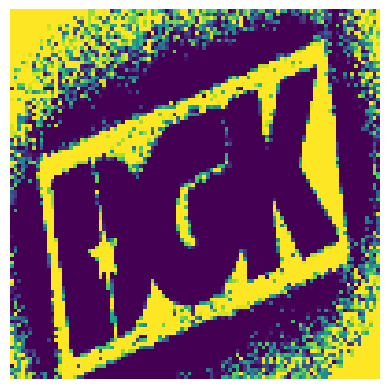

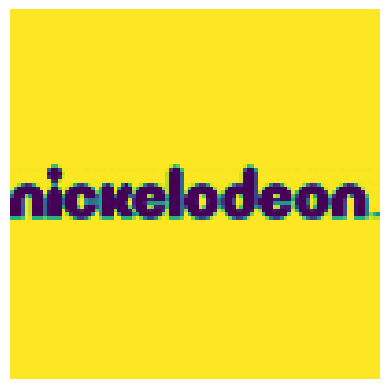

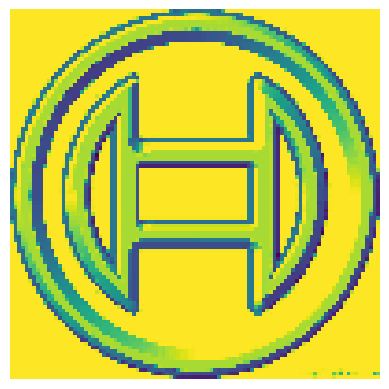

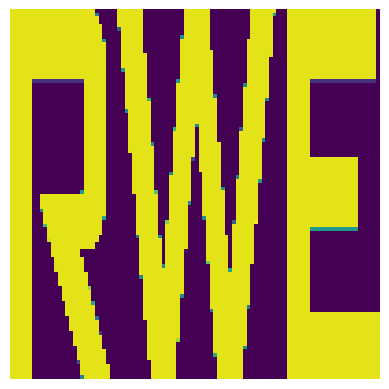

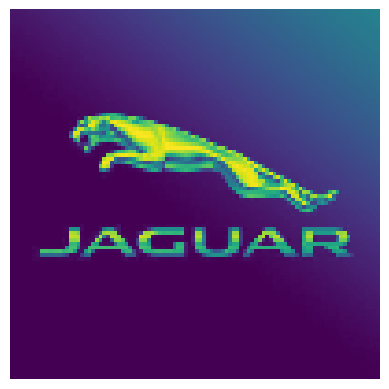

In [ ]:
np.random.seed(17)
for i in np.random.randint(0, len(X), 5):
  plt.figure()
  plt.imshow(X[i].reshape(100, 100)), plt.axis('off')

In [ ]:
encoder = LabelEncoder()
Targets = encoder.fit_transform(df['team_name'])
Targets
Targets.shape

(17218,)

In [ ]:
n_classes = df['team_name'].nunique()
print('Total number of unique categories:', n_classes)

Total number of unique categories: 625


In [ ]:
Y = to_categorical(Targets, num_classes = n_classes)
Y[0:3]
Y.shape

(17218, 625)

In [ ]:
X_test = X[14000:,]
Y_test = Y[14000:,]

X_train, X_val, Y_train, Y_val = train_test_split(X[:14000,], Y[:14000,], test_size=0.15, random_state=13)

In [ ]:
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_val.shape

(2100, 100, 100, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                        

In [ ]:
save_best = ModelCheckpoint (monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')


In [ ]:
history = model.fit( X_train, Y_train, 
                    epochs = 15, batch_size = 100, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X_val, Y_val))

Epoch 1/15
119/119 [==============================] - 395s 3s/step - loss: 6.1014 - accuracy: 0.0062 - val_loss: 6.1806 - val_accuracy: 0.0048
Epoch 2/15
119/119 [==============================] - 374s 3s/step - loss: 6.0984 - accuracy: 0.0069 - val_loss: 6.1502 - val_accuracy: 0.0062
Epoch 3/15
119/119 [==============================] - 361s 3s/step - loss: 6.0825 - accuracy: 0.0069 - val_loss: 6.1549 - val_accuracy: 0.0057
Epoch 4/15
119/119 [==============================] - 358s 3s/step - loss: 6.0649 - accuracy: 0.0087 - val_loss: 6.1975 - val_accuracy: 0.0086
Epoch 5/15
119/119 [==============================] - 357s 3s/step - loss: 6.0407 - accuracy: 0.0073 - val_loss: 6.2157 - val_accuracy: 0.0067
Epoch 6/15
119/119 [==============================] - 357s 3s/step - loss: 6.0298 - accuracy: 0.0090 - val_loss: 6.1281 - val_accuracy: 0.0100
Epoch 7/15
119/119 [==============================] - 358s 3s/step - loss: 6.0225 - accuracy: 0.0094 - val_loss: 6.1420 - val_accuracy: 0.0076

In [ ]:
model.save("realorfake.hdf5")